<h2> 2. Exploratory Data Analysis </h2>

Now, let's do Exploratory Data Analysis (EDA) to check the data and create data visuals. First, the csv file saved in the first notebbok has to be loaded.


In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


<h3> 2.1. Summary Statistics </h3>
In this step, I will get the summary statistics for the data set. Yet, first I will check if there are any missing values.

In [3]:
#check for missing values
df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarse_agg          0
fine_agg            0
age                 0
strength            0
dtype: int64

We conclude that there are no missing values. Now, let's check the summary statistics for each column. 

In [4]:
#check min, median, max, quartiles, mean and std
df.describe()

,cement,slag,ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


<h3> 2.2. Visualization </h3>

Having seen the numerical summaries, I will continue the analysis with visualization.


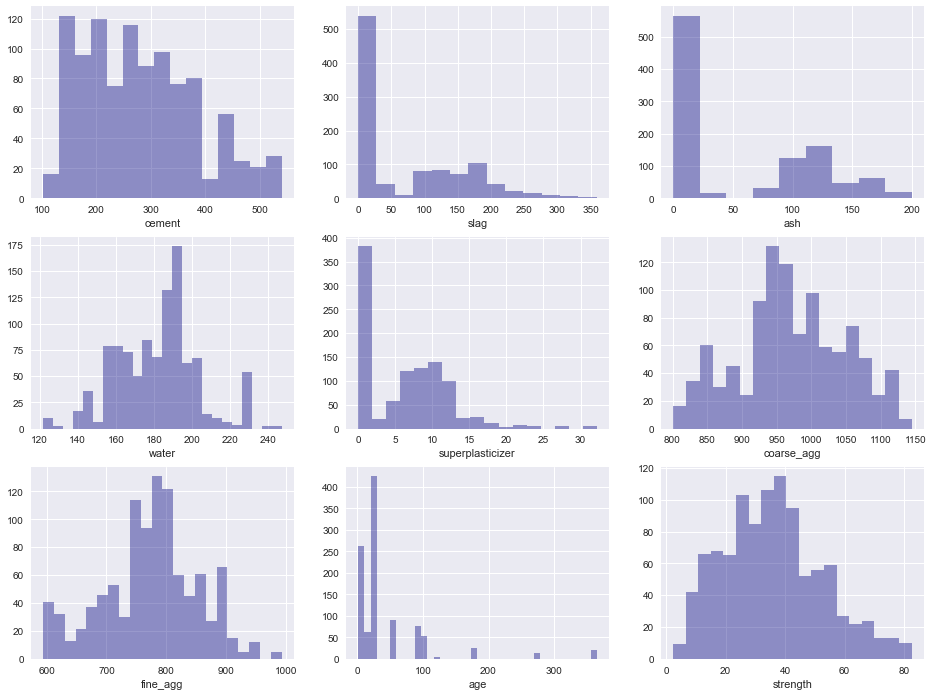

In [5]:
# plot histograms for each column
i = 1
plt.figure(figsize=(16,12))
plt.style.use("seaborn")
for column in df:
  plt.subplot(3, 3, i)
  sns.distplot(df[column], kde = False, color="#000080")
  i+=1

In the plot above, it is noticeable that most of the variables do not follow a normal distribution while one might argue that some variables like **coarse_agg** and **fine_agg** have sufficiently good approximations to the normal distributon. 
Now let's see if there are outliers using Tukey's fenses:

Let $Q_{3, d} \mbox{ and } Q_{1, d}$ be the third and first quartiles for distribution *d*, respectively.

Let $g$ be the function that, when supplied with a value $x$ and a distribution d, returns 1 if $x$ is an outlier in distribution $d$ and 0 otherwise. Then, the outlier function $g$ is as follows:

$g(x, d) = \left\{
  \begin{array}{ll}
    1 & \mbox{if } x \geq Q_{3, d} + 1.5*(Q_{3, d} - Q_{1, d}) \\
    1 & \mbox{if } x \leq Q_{1, d} - 1.5*(Q_{3, d} - Q_{1, d}) \\
		0 & \mbox{otherwise} 
  \end{array}
\right.
$


In [6]:
#define outlier function
#input: a distribution (such as df["water"])
#output: a list of outliers
def find_outliers(my_dist):
  #find quartiles
  sorted_dist = sorted(my_dist)
  q1, q3 = np.quantile(sorted_dist, [0.25, 0.75])
  iqr = q3-q1

  #define lower and upper bounds
  low_b = q1 - (1.5*iqr)
  up_b = q3 + (1.5*iqr)

  outliers = [x for x in my_dist if x >= up_b or x <= low_b]

  return outliers

In [7]:
#Print number of outliers for each column
print("Number of outliers by column")
for column in df:
  print(column, ":", len(find_outliers(df[column])))

Number of outliers by column
cement : 0
slag : 2
ash : 0
water : 9
superplasticizer : 10
coarse_agg : 0
fine_agg : 5
age : 59
strength : 4


Now, let's see how much correlation there is between the target variable (i.e. strength) and the input variables.

In [8]:
#check correlation between the target and inputs
features = ["cement","slag", "ash", "water", "superplasticizer", "coarse_agg", "fine_agg", "age", "strength"]
df[features].corr()["strength"][:].drop("strength")

cement              0.497833
slag                0.134824
ash                -0.105753
water              -0.289613
superplasticizer    0.366102
coarse_agg         -0.164928
fine_agg           -0.167249
age                 0.328877
Name: strength, dtype: float64

Let's check correlations among all input variables using a heatmap with a dendrogram.

<Figure size 72x72 with 0 Axes>

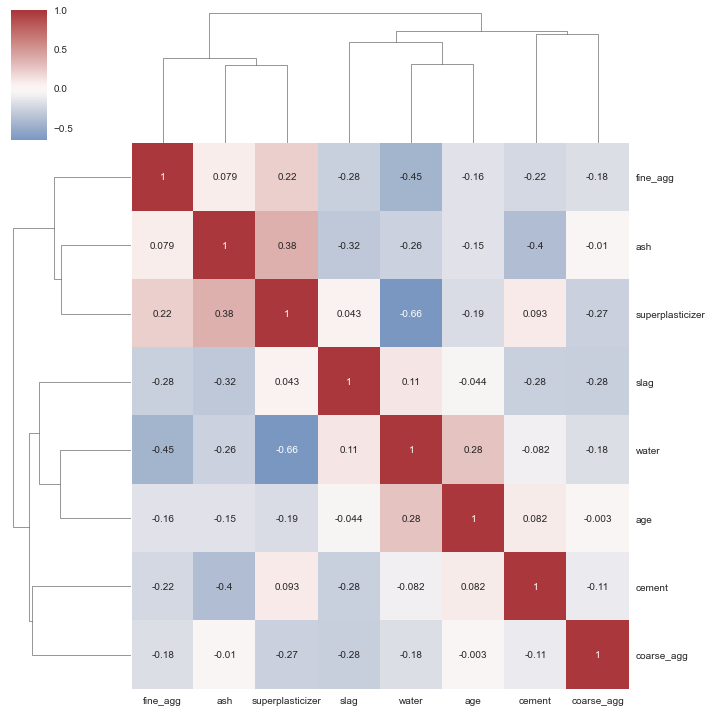

In [9]:
#check correlations among all input variables using a clustermap (heatmap + dendrogram)
plt.figure(figsize=(1,1))
sns.clustermap(df.drop("strength", axis=1).corr(), annot=True, center = 0, cmap="vlag")

As can be seen in the light-blue-dominated heatmap, most variables have negative to zero correlation among them.

We notice a strong negative correlation between superplasticizer content and water content. This negative relationship makes sense because superplasticizers are special types of water reducers that significantly reduce the amount of water required to make concrete. Thus, as superplasticizer content increases, water content is expected to decrease.

Since the original data set has not been modified in the Exploratory Data Analysis phase, it's not saved as it was in the first notebook. The next notebook will load the

The following Jupyter notebook will incorporate Data Preprocessing steps and the Modeling phase for some machine learning models.